### Logistic Regression

<img src='images/log1.PNG' width='50%' height='50%'/>

<img src='images/log2.PNG' width='80%' height='80%'/>

<img src='images/log6.PNG' width='60%' height='60%'/>

<img src='images/log4.PNG' width='60%' height='60%'/>

<img src='images/log5.PNG' width='60%' height='60%'/>

<img src='images/log_7.PNG' width='90%' width='90%'/>

<img src='images/C_para.PNG' width='60%' height='60%'/>

### Generate Dataset

In [8]:
from sklearn.datasets.samples_generator import make_blobs,make_moons
import matplotlib.pyplot as plt
import numpy as np

C:\Users\SachTech\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [76]:
X,y=make_blobs(n_samples=300,centers=2,random_state=0,cluster_std=0.5)

In [77]:
X.shape

(300, 2)

In [78]:
np.unique(y)

array([0, 1])

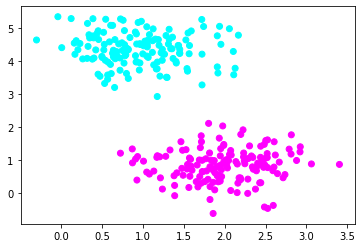

In [79]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='cool')
plt.show()

In [80]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [115]:
log = LogisticRegression(C=10)
#C=.1,1,10,100

In [116]:
log.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
log.coef_

array([[ 1.42887433, -4.63879947]])

In [118]:
log.intercept_

array([9.63774941])

<img src='images/log_ex.jpg' width='70%' height='70%'/>

In [91]:
log.coef_[0]

array([ 0.88043549, -3.0438658 ])

In [119]:
w = log.coef_[0]
a = -w[0] / w[1]


In [120]:
x1 = np.linspace(-1,4.0,50)

In [108]:
# x1

In [121]:
x2 =  a * x1 + (-log.intercept_[0]) / w[1]

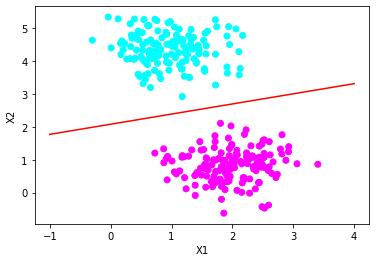

In [122]:
plt.plot(x1,x2,c="red")
plt.scatter(X[:,0],X[:,1],c=y,cmap='cool')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Add an outlier

In [123]:
X_new = np.append(X,[[3.5,2]],axis=0)
y_new = np.append(y,[0])

In [124]:
X.shape

(300, 2)

In [125]:
X_new.shape

(301, 2)

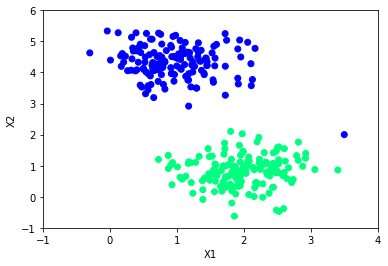

In [126]:
#plt.plot(x1,x2)
plt.scatter(X_new[:,0],X_new[:,1],c=y_new,cmap='winter')

plt.xlabel('X1')
plt.xlim([-1,4])
plt.ylim([-1,6])
plt.ylabel('X2')
plt.show()

In [138]:
log1 = LogisticRegression(C=10000000) 
log1.fit(X_new,y_new)

LogisticRegression(C=10000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [139]:
log1.score(X_new,y_new)

1.0

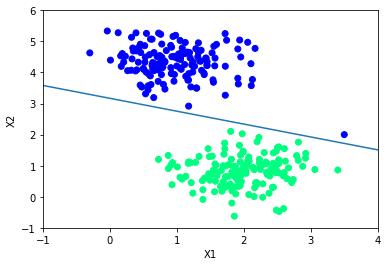

4.0 1.5094065789609812


In [141]:
w = log1.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-1,4.0,50)
x2 =  a * x1 + (-log1.intercept_[0]) / w[1]
plt.plot(x1,x2)
plt.scatter(X_new[:,0],X_new[:,1],c=y_new,cmap='winter')

plt.xlabel('X1')
plt.xlim([-1,4])
plt.ylim([-1,6])
plt.ylabel('X2')
plt.show()
x1[0],x2[0]
print(x1[-1],x2[-1])

### Let's test on Iris Dataset

<img src='images/iris_dataset.png'>

### Class details
<img src='images/iris.png'>

In [220]:
from sklearn.datasets import load_iris
iris = load_iris()

In [221]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [222]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [223]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [224]:
import pandas as pd

In [225]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df["target"] = iris.target
df.head()
# df.iloc[50:,2:].target.value_counts()
df.target.value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [226]:
# 0:50 - 0
# 50: 100 - 1
# 100:150 - 2

In [227]:
X = iris.data[50:,2:]
y = iris.target[50:]

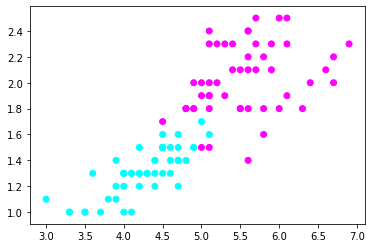

In [228]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='cool')

Score:  0.94


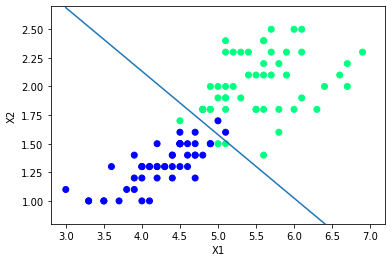

In [229]:
log1 = LogisticRegression(C=1000)
log1.fit(X,y)
print("Score: ", log1.score(X,y))
w = log1.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(3,7,50)
x2 =  a * x1 + (-log1.intercept_[0]) / w[1]

plt.plot(x1,x2)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter')

plt.xlabel('X1')
plt.xlim([2.8,7.2])
plt.ylim([0.8,2.7])
plt.ylabel('X2')
plt.show()

In [230]:
pred=log1.predict(X)

In [231]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [232]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [178]:
np.where(y != pred)

(array([20, 27, 33, 56, 69, 83], dtype=int64),)

In [245]:
labels = {1:"Versicolor",2:"Verginica"}
d = [[2,1.5]]
p=log1.predict(d)
labels[p[0]]

'Versicolor'

In [194]:
df=pd.DataFrame({"Actual":y,"Prediction":pred})
df.loc[8:]

Actual  Prediction
8        1           1
9        1           1
10       1           1
11       1           1
12       1           1
..     ...         ...
95       2           2
96       2           2
97       2           2
98       2           2
99       2           2

[92 rows x 2 columns]

### Let try another dataset : Hadwritten digit

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()


In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
X = digits.data
y = digits.target

In [5]:
X.shape

(1797, 64)

In [9]:
X[0].shape

(64,)

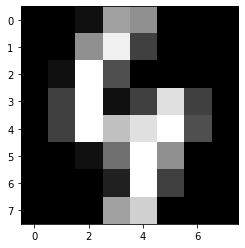

In [10]:
plt.imshow(X[111].reshape(8,8),cmap="gray")

In [13]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
import matplotlib.pyplot as plt

In [18]:
t=X[0].reshape(8,8)

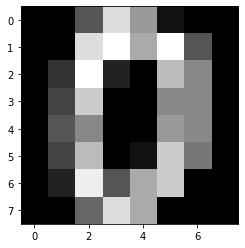

In [19]:
plt.imshow(t,cmap='gray')

In [20]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
digits.target.shape

(1797,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=10)

In [26]:
from sklearn.linear_model import LogisticRegression

log1=LogisticRegression(C=10)
log1.fit(xtrain,ytrain)

C:\Users\SachTech\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
log1.score(xtrain,ytrain)

1.0

In [28]:
log1.score(xtest,ytest)

0.95